# <font color='red'>Documents classification</font>

# Lecture d'un documents

In [5]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
prt = nltk.stem.PorterStemmer()

def preprocess(document_path):
    
    with open(document_path, 'r', encoding="utf8") as file:
        document = file.read()
    
    tokens = nltk.word_tokenize(document)

    tokens_pun_lower = [i.lower() for i in tokens if i.isalnum()]

    tokens_stop = [i for i in tokens_pun_lower if i not in stop_words]

    terms = [prt.stem(i) for i in tokens_stop]
    
    return " ".join(terms)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TALEBZAKARIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TALEBZAKARIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Récupération du data set

In [7]:
import numpy as np
import pandas as pd 


Data = []
import os
for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        doc_class = filename.split('_')[0].lower()
        doc_titles = filename
        documents = preprocess(os.path.join(dirname, filename))
        
        Data.append([doc_titles, documents, doc_class])

df = pd.DataFrame (Data, columns = ['Title', 'Document', 'Class'])
df

,Title,Document,Class
0,business_1.txt,lufthansa fli back profit german airlin luftha...,business
1,business_10.txt,file bankruptci us supermarket group file bank...,business
2,business_100.txt,us economi still grow say fed area us saw econ...,business
3,business_11.txt,saab build cadillac sweden gener motor world l...,business
4,business_12.txt,bank vote rate chang decis keep interest rate ...,business
...,...,...,...
995,technologie_95.txt,mobil game come age bbc news websit take look ...,technologie
996,technologie_96.txt,california set fine spywar maker comput progra...,technologie
997,technologie_97.txt,web help collect aid donat web help aid agenc ...,technologie
998,technologie_98.txt,mobil rack 20 year use mobil phone uk celebr 2...,technologie


# Les informations des données

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1000 non-null   object
 1   Document  1000 non-null   object
 2   Class     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


# Présentation numérique des classes 

In [9]:
classesList = df['Class'].unique()
classesList

array(['business', 'entertainment', 'food', 'graphics', 'historical',
       'medical', 'politics', 'space', 'sport', 'technologie'],
      dtype=object)

In [10]:
df['Class'] = pd.factorize(df['Class'])[0]
df

,Title,Document,Class
0,business_1.txt,lufthansa fli back profit german airlin luftha...,0
1,business_10.txt,file bankruptci us supermarket group file bank...,0
2,business_100.txt,us economi still grow say fed area us saw econ...,0
3,business_11.txt,saab build cadillac sweden gener motor world l...,0
4,business_12.txt,bank vote rate chang decis keep interest rate ...,0
...,...,...,...
995,technologie_95.txt,mobil game come age bbc news websit take look ...,9
996,technologie_96.txt,california set fine spywar maker comput progra...,9
997,technologie_97.txt,web help collect aid donat web help aid agenc ...,9
998,technologie_98.txt,mobil rack 20 year use mobil phone uk celebr 2...,9


In [11]:
df.info()
df.groupby('Class').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1000 non-null   object
 1   Document  1000 non-null   object
 2   Class     1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


,Title,Document
Class,,
0,100,100
1,100,100
2,100,100
3,100,100
4,100,100
5,100,100
6,100,100
7,100,100
8,100,100


In [12]:
# Mélanger les lignes 
df_s = df.sample(frac = 1, ignore_index = True)
X = df_s['Document']
y = df_s['Class']
df_s

,Title,Document,Class
0,entertainment_66.txt,dirti den demis seen 14m 14 million peopl saw ...,1
1,entertainment_42.txt,three dj replac peel radio show late john peel...,1
2,medical_292.txt,anybodi know inform regard implementaion total...,5
3,technologie_70.txt,iphon se iphon x buy refurbish phone yet appl ...,9
4,entertainment_43.txt,youssou win music prize senegales musician you...,1
...,...,...,...
995,sport_82.txt,greek duo clear dope case sprinter kosta kente...,8
996,graphics_83.txt,7 best free tool allow creat profession graphi...,3
997,entertainment_86.txt,hundr vie best film oscar total 267 film elig ...,1
998,historical_8.txt,hitler secretli met japanes gener wwii tomoyuk...,4


## Division du data set en 2 parties (80%-20%)

In [13]:
#split test train 80%: train, 20% : test 
X_train = []
y_train = []
X_test = []
y_test = []
classTest = [0]*len(classesList)
for i in range (len(y)):
    if classTest[y[i]] < 20:
        X_test.append(X[i])
        y_test.append(y[i])
        classTest[y[i]] += 1
    else:
        X_train.append(X[i])
        y_train.append(y[i])
print(classTest)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


# Vectorisation des documents

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [15]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

# Création du modèle

In [36]:
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

embedding_dim = 50
input_shape = X_train.shape[1]
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(64, input_dim=input_shape, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 50)           870700    
                                                                 
 flatten_3 (Flatten)         (None, 5000)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                320064    
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,193,174
Trainable params: 1,193,174
Non-trainable params: 0
_________________________________________________________________


# Entrainement

In [37]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=5)

Epoch 1/5
160/160 [==============================] - 3s 16ms/step - loss: 2.2012 - accuracy: 0.1562 - val_loss: 2.0383 - val_accuracy: 0.2650
Epoch 2/5
160/160 [==============================] - 2s 15ms/step - loss: 0.9736 - accuracy: 0.7663 - val_loss: 0.6299 - val_accuracy: 0.8300
Epoch 3/5
160/160 [==============================] - 2s 15ms/step - loss: 0.0466 - accuracy: 0.9937 - val_loss: 0.5172 - val_accuracy: 0.8300
Epoch 4/5
160/160 [==============================] - 2s 15ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.4934 - val_accuracy: 0.8350
Epoch 5/5
160/160 [==============================] - 2s 15ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4301 - val_accuracy: 0.8750


# Visualisation des résultats

In [31]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

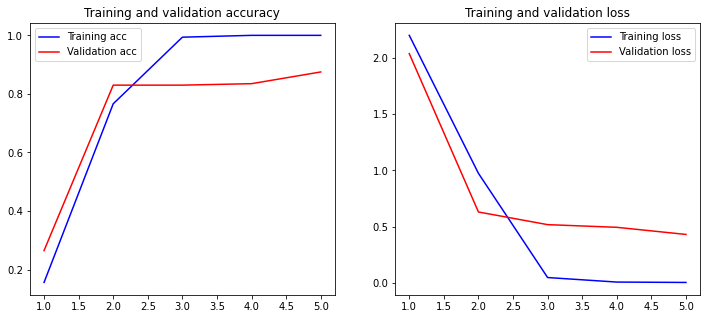

In [38]:
plot_history(history)